In [14]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import matching_catalog
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
cosmos_clauds_hsc = Table.read('../../WP221_Target_selection/data/COSMOS_11bands-SExtractor-Lephare.fits')

In [17]:
cosmos_clauds_hsc.colnames

['ID',
 'RA',
 'DEC',
 'TRACT',
 'PATCH',
 'MASK',
 'FLAG_FIELD',
 'A_WORLD',
 'B_WORLD',
 'KRON_RADIUS',
 'THETA_WORLD',
 'ELONGATION',
 'ELLIPTICITY',
 'EB_V',
 'FWHM_WORLD_HSC_I',
 'MU_MAX_HSC_I',
 'CLASS_STAR_HSC_I',
 'FLUX_RADIUS_0.25_HSC_I',
 'FLUX_RADIUS_0.5_HSC_I',
 'FLUX_RADIUS_0.75_HSC_I',
 'FUV',
 'NUV',
 'u',
 'uS',
 'g',
 'r',
 'i',
 'z',
 'y',
 'Yv',
 'J',
 'H',
 'Ks',
 'FUV_err',
 'NUV_err',
 'u_err',
 'uS_err',
 'g_err',
 'r_err',
 'i_err',
 'z_err',
 'y_err',
 'Yv_err',
 'J_err',
 'H_err',
 'Ks_err',
 'MAG_APER_2s_u',
 'MAG_APER_2s_uS',
 'MAG_APER_2s_g',
 'MAG_APER_2s_r',
 'MAG_APER_2s_i',
 'MAG_APER_2s_z',
 'MAG_APER_2s_y',
 'MAG_APER_2s_Yv',
 'MAG_APER_2s_J',
 'MAG_APER_2s_H',
 'MAG_APER_2s_Ks',
 'MAGERR_APER_2s_u',
 'MAGERR_APER_2s_uS',
 'MAGERR_APER_2s_g',
 'MAGERR_APER_2s_r',
 'MAGERR_APER_2s_i',
 'MAGERR_APER_2s_z',
 'MAGERR_APER_2s_y',
 'MAGERR_APER_2s_Yv',
 'MAGERR_APER_2s_J',
 'MAGERR_APER_2s_H',
 'MAGERR_APER_2s_Ks',
 'MAG_APER_3s_u',
 'MAG_APER_3s_uS',
 'MAG

In [3]:
cosmos_clauds_hsc_column_to_keep = [ 'u',
 'uS',
 'g',
 'r',
 'i',
 'z',
 'y',
 'Yv',
 'J',
 'H',
 'Ks',
 'FUV_err',
 'NUV_err',
 'u_err',
 'uS_err',
 'g_err',
 'r_err',
 'i_err',
 'z_err',
 'y_err',
 'Yv_err',
 'J_err',
 'H_err',
 'Ks_err','ZPHOT',]

In [4]:
cosmo_allwise = Table.read("../data/COSMOS_allWise_W1234.tbl", format="ascii.ipac")

In [5]:
allwise_column_to_keep = ['ra',
 'dec',
 'w1mpro',
 'w1sigmpro',
 'w2mpro',
 'w2sigmpro',
 'w3mpro',
 'w3sigmpro',
 'w4mpro',
 'w4sigmpro',]

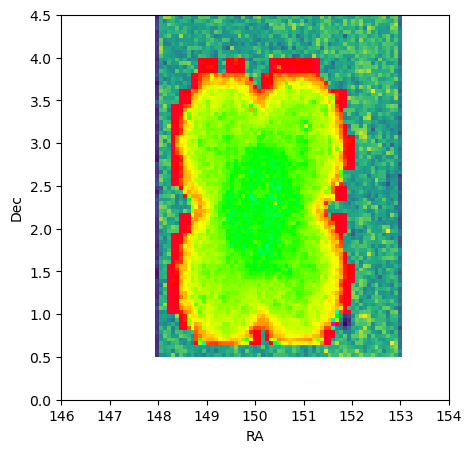

In [6]:
bins_ra = np.linspace(146, 154, 100)
bins_dec = np.linspace(0, 4.5, 100)
bins_ = [bins_ra, bins_dec]
plt.figure(figsize=(5,5))
# 2D histogram
bins_ = [np.linspace(146, 154, 100), np.linspace(0, 4.5, 100)] 
plt.hist2d(cosmo_allwise ['ra'], cosmo_allwise['dec'], cmin=1, bins=bins_) 
plt.hist2d(cosmos_clauds_hsc['RA'], cosmos_clauds_hsc['DEC'], bins = bins_, cmin=1, cmap='gist_rainbow')
plt.xlabel('RA')
plt.ylabel('Dec')
plt.show()

In [7]:
mask_clauds_hsc = (cosmos_clauds_hsc['r']<25) * (cosmos_clauds_hsc['RA']>149) * (cosmos_clauds_hsc['RA']<151)
mask_clauds_hsc *= (cosmos_clauds_hsc['DEC']>1) * (cosmos_clauds_hsc['DEC']<3.5)
mask_wise = (cosmo_allwise['ra']>149) * (cosmo_allwise['ra']<151)
mask_wise *= (cosmo_allwise['dec']>1) * (cosmo_allwise['dec']<3.5)

In [8]:
matched_catalog = matching_catalog.match_nearest_neghbor(base_catalog = cosmo_allwise[mask_wise], 
                                                         ra_base = 'ra', dec_base = 'dec', label_base = '_base',
                                                          target_catalog = cosmos_clauds_hsc[mask_clauds_hsc], 
                                                         ra_target = 'RA', dec_target = 'DEC',label_target = '_target', 
                                                        max_sep_arcsec = 1)

In [9]:
matched_catalog_to_save = Table()
for n in cosmos_clauds_hsc_column_to_keep:
    matched_catalog_to_save[n] = matched_catalog[n+'_target']
for n in allwise_column_to_keep:
    matched_catalog_to_save[n] = matched_catalog[n+'_base']

In [10]:
matched_catalog_to_save.write('../data/COSMOS_clauds_hsc_allwise.fits', overwrite=True)